# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
# (a) Load data (features)
def load_data():
    filename = "/home/akshay/Downloads/MAIL/24787HW4-F21/q1-data/features.npy"
    data_ = np.load(filename)
    mean_data = np.mean(data_, axis = 0) 
    std_ = np.std(data_, axis = 0)
    data = (data_ - mean_data) / std_
    return data

In [3]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    covariance = (1 / X.shape[0]) * (X.T @ X)
    e, v = np.linalg.eig(covariance)
    sort_idx = np.argsort(e)
    sort_idx = sort_idx[::-1]
    sorted_eig_vals = e[sort_idx]
    sorted_eig_vecs = v[sort_idx]
    return (sorted_eig_vals, sorted_eig_vecs)

In [56]:
# (c) Evaluate using variance_explained as the metric
def eval(sorted_eig_vals):
    sum_eig = np.sum(sorted_eig_vals)
    for k in range(1, sorted_eig_vals.shape[0]+1, 1):
        print("k:", k, np.round(np.sum(sorted_eig_vals[:k]) / sum_eig, 3), "Eigen Values: ", sorted_eig_vals[:k])
#np.round(np.sum(sorted_eig_vals[:k]) / sum_eig, 3),    

In [57]:
# (d) Visualize after projecting to 2-D space
def viz(sorted_eig_vals, sorted_eig_vecs, data):
    projected = data @ sorted_eig_vecs[:,:2]
    filename = "/home/akshay/Downloads/MAIL/24787HW4-F21/q1-data/labels.npy"
    labels = np.load(filename, allow_pickle=True)
    class_0 = projected[np.where(labels == 0)]
    class_1 = projected[np.where(labels == 1)]
    class_2 = projected[np.where(labels == 2)]
    fig, ax = plt.subplots(1)
    ax.scatter(class_0[:,0], class_0[:,1], color='r', label="Class 0")
    ax.scatter(class_1[:,0], class_1[:,1], color='b', label="Class 1")
    ax.scatter(class_2[:,0], class_2[:,1], color='g', label="Class 2")
    ax.legend()
    ax.set_xlabel("Feature_1")
    ax.set_ylabel("Feature_2")

k: 1 0.589 Eigen Values:  [4.71136968]
k: 2 0.874 Eigen Values:  [4.71136968 2.2805474 ]
k: 3 0.97 Eigen Values:  [4.71136968 2.2805474  0.77173111]
k: 4 0.996 Eigen Values:  [4.71136968 2.2805474  0.77173111 0.20281175]
k: 5 1.0 Eigen Values:  [4.71136968 2.2805474  0.77173111 0.20281175 0.03354006]
k: 6 1.0 Eigen Values:  [4.71136968e+00 2.28054740e+00 7.71731109e-01 2.02811748e-01
 3.35400649e-02 5.53596026e-16]
k: 7 1.0 Eigen Values:  [4.71136968e+00 2.28054740e+00 7.71731109e-01 2.02811748e-01
 3.35400649e-02 5.53596026e-16 3.03086151e-16]
k: 8 1.0 Eigen Values:  [ 4.71136968e+00  2.28054740e+00  7.71731109e-01  2.02811748e-01
  3.35400649e-02  5.53596026e-16  3.03086151e-16 -6.82293804e-16]


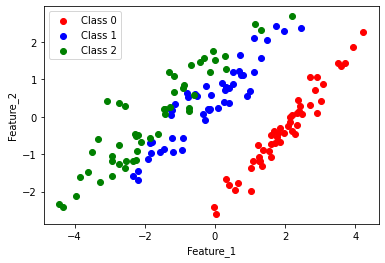

In [58]:
def main():
    data = load_data()
    sorted_eig_vals, sorted_eig_vecs = eigendecomp(data)
    eval(sorted_eig_vals)
    viz(sorted_eig_vals, sorted_eig_vecs, data)

if __name__ == "__main__":
    main()

The covariance matrix will be 1000*1000 dimension. 
### To improve the performance
1. We should increase the number of data collected.
2. We should use PCA to reduce the number of features, preferably to 1 or 2. This will remove the redundant features 

### The following x+y is a dataset of 9 data with 2 dimensionality, if we make it 1 dimension the data at one end will be misclassified. 

[2 2 1 2 3] [2 1 2 3 2]


Text(0, 0.5, 'Feature_2')

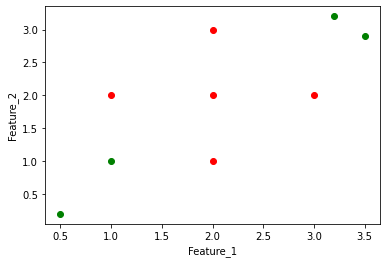

In [48]:
x = np.asarray([[2,2], [2,1], [1,2], [2,3], [3,2]])
y = np.asarray([[1,1], [3.2,3.2], [3.5,2.9], [.5,.2]])
print(x[:,0], x[:,1])
fig, ax = plt.subplots(1)
ax.scatter(x[:,0], x[:,1], color='r', label="Class_1")
ax.scatter(y[:,0], y[:,1], color='g', label="Class_2")
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")

/bin/bash: -c: line 0: syntax error near unexpected token `<'
/bin/bash: -c: line 0: `[title](<your_plot_file_path>)'
